In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('train.csv').drop(labels='id', axis='columns')
df.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [3]:
gender_dict = {
    'I': 0,
    'F': 1,
    'M': 2
}

df['Sex'] = [gender_dict[t] for t in df['Sex']]

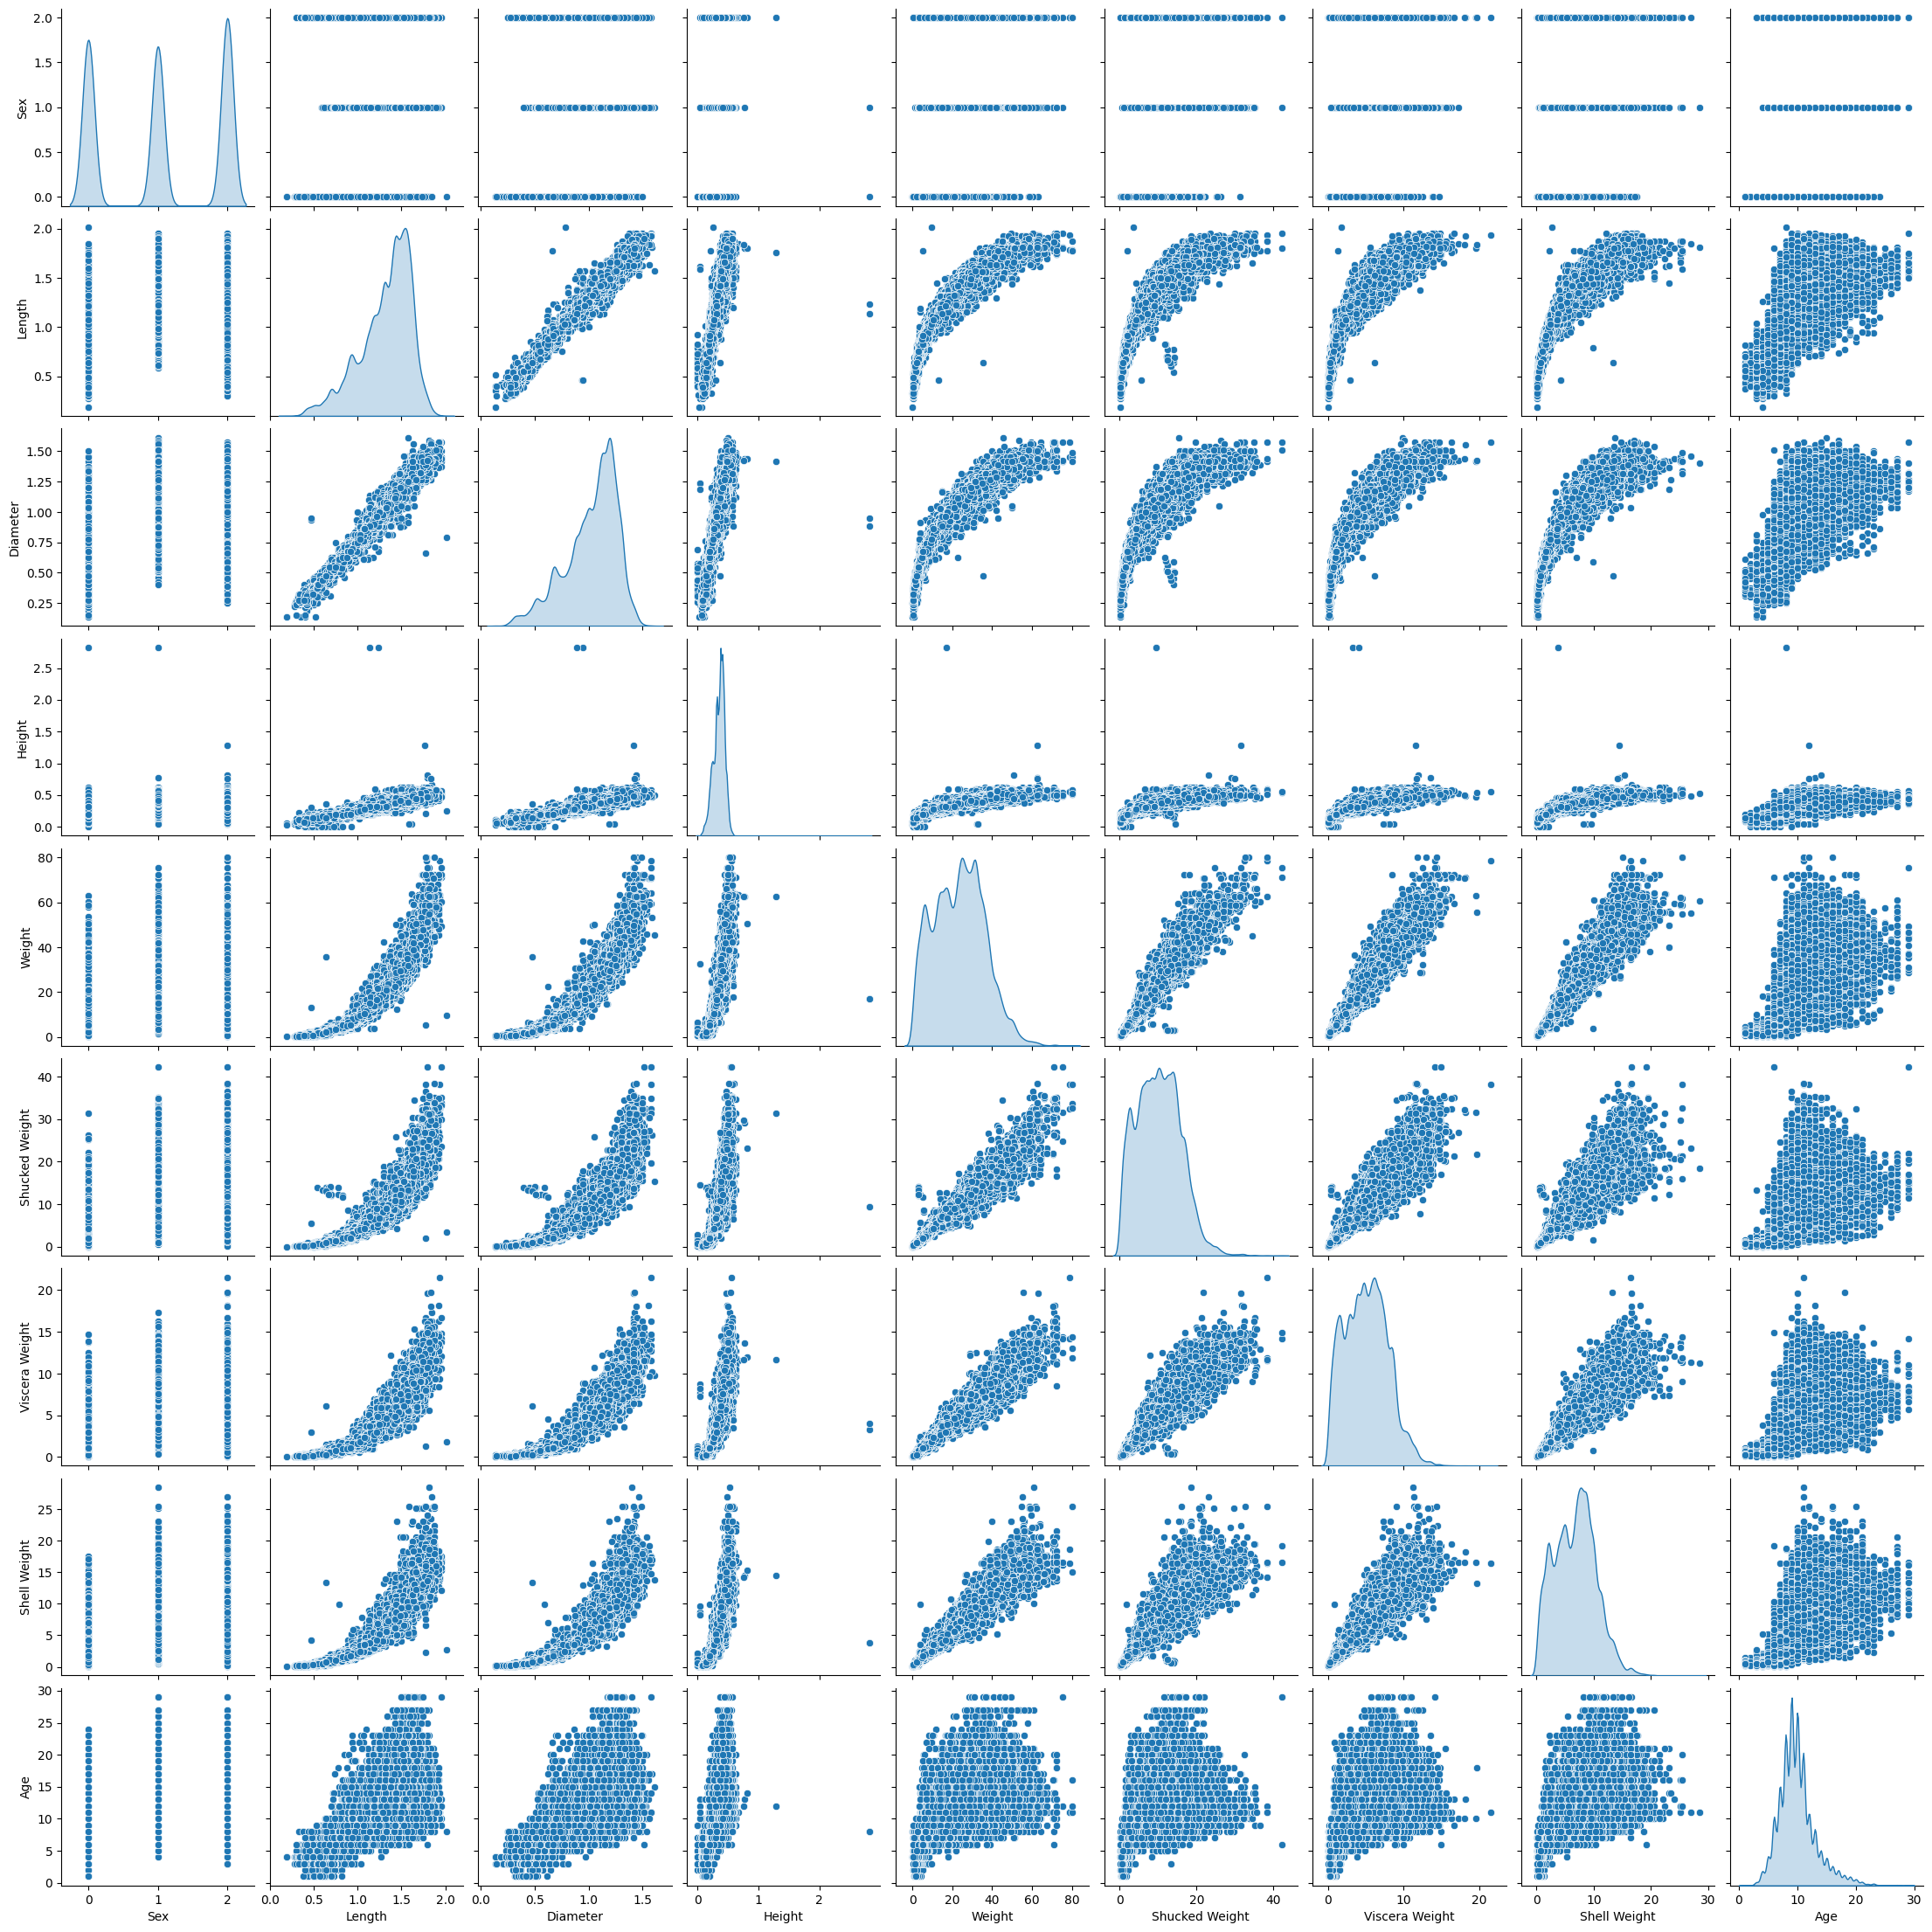

In [4]:
columns = df.columns
sns.pairplot(df, diag_kind='kde')

In [5]:
need_normalize = []

for cols in df.columns:
    if cols != 'Sex' and cols != 'Age':
        need_normalize.append(cols)

need_normalize

['Length',
 'Diameter',
 'Height',
 'Weight',
 'Shucked Weight',
 'Viscera Weight',
 'Shell Weight']

In [6]:
from sklearn.preprocessing import QuantileTransformer


transformer=QuantileTransformer(output_distribution='normal')
df[need_normalize] = transformer.fit_transform(df[need_normalize])

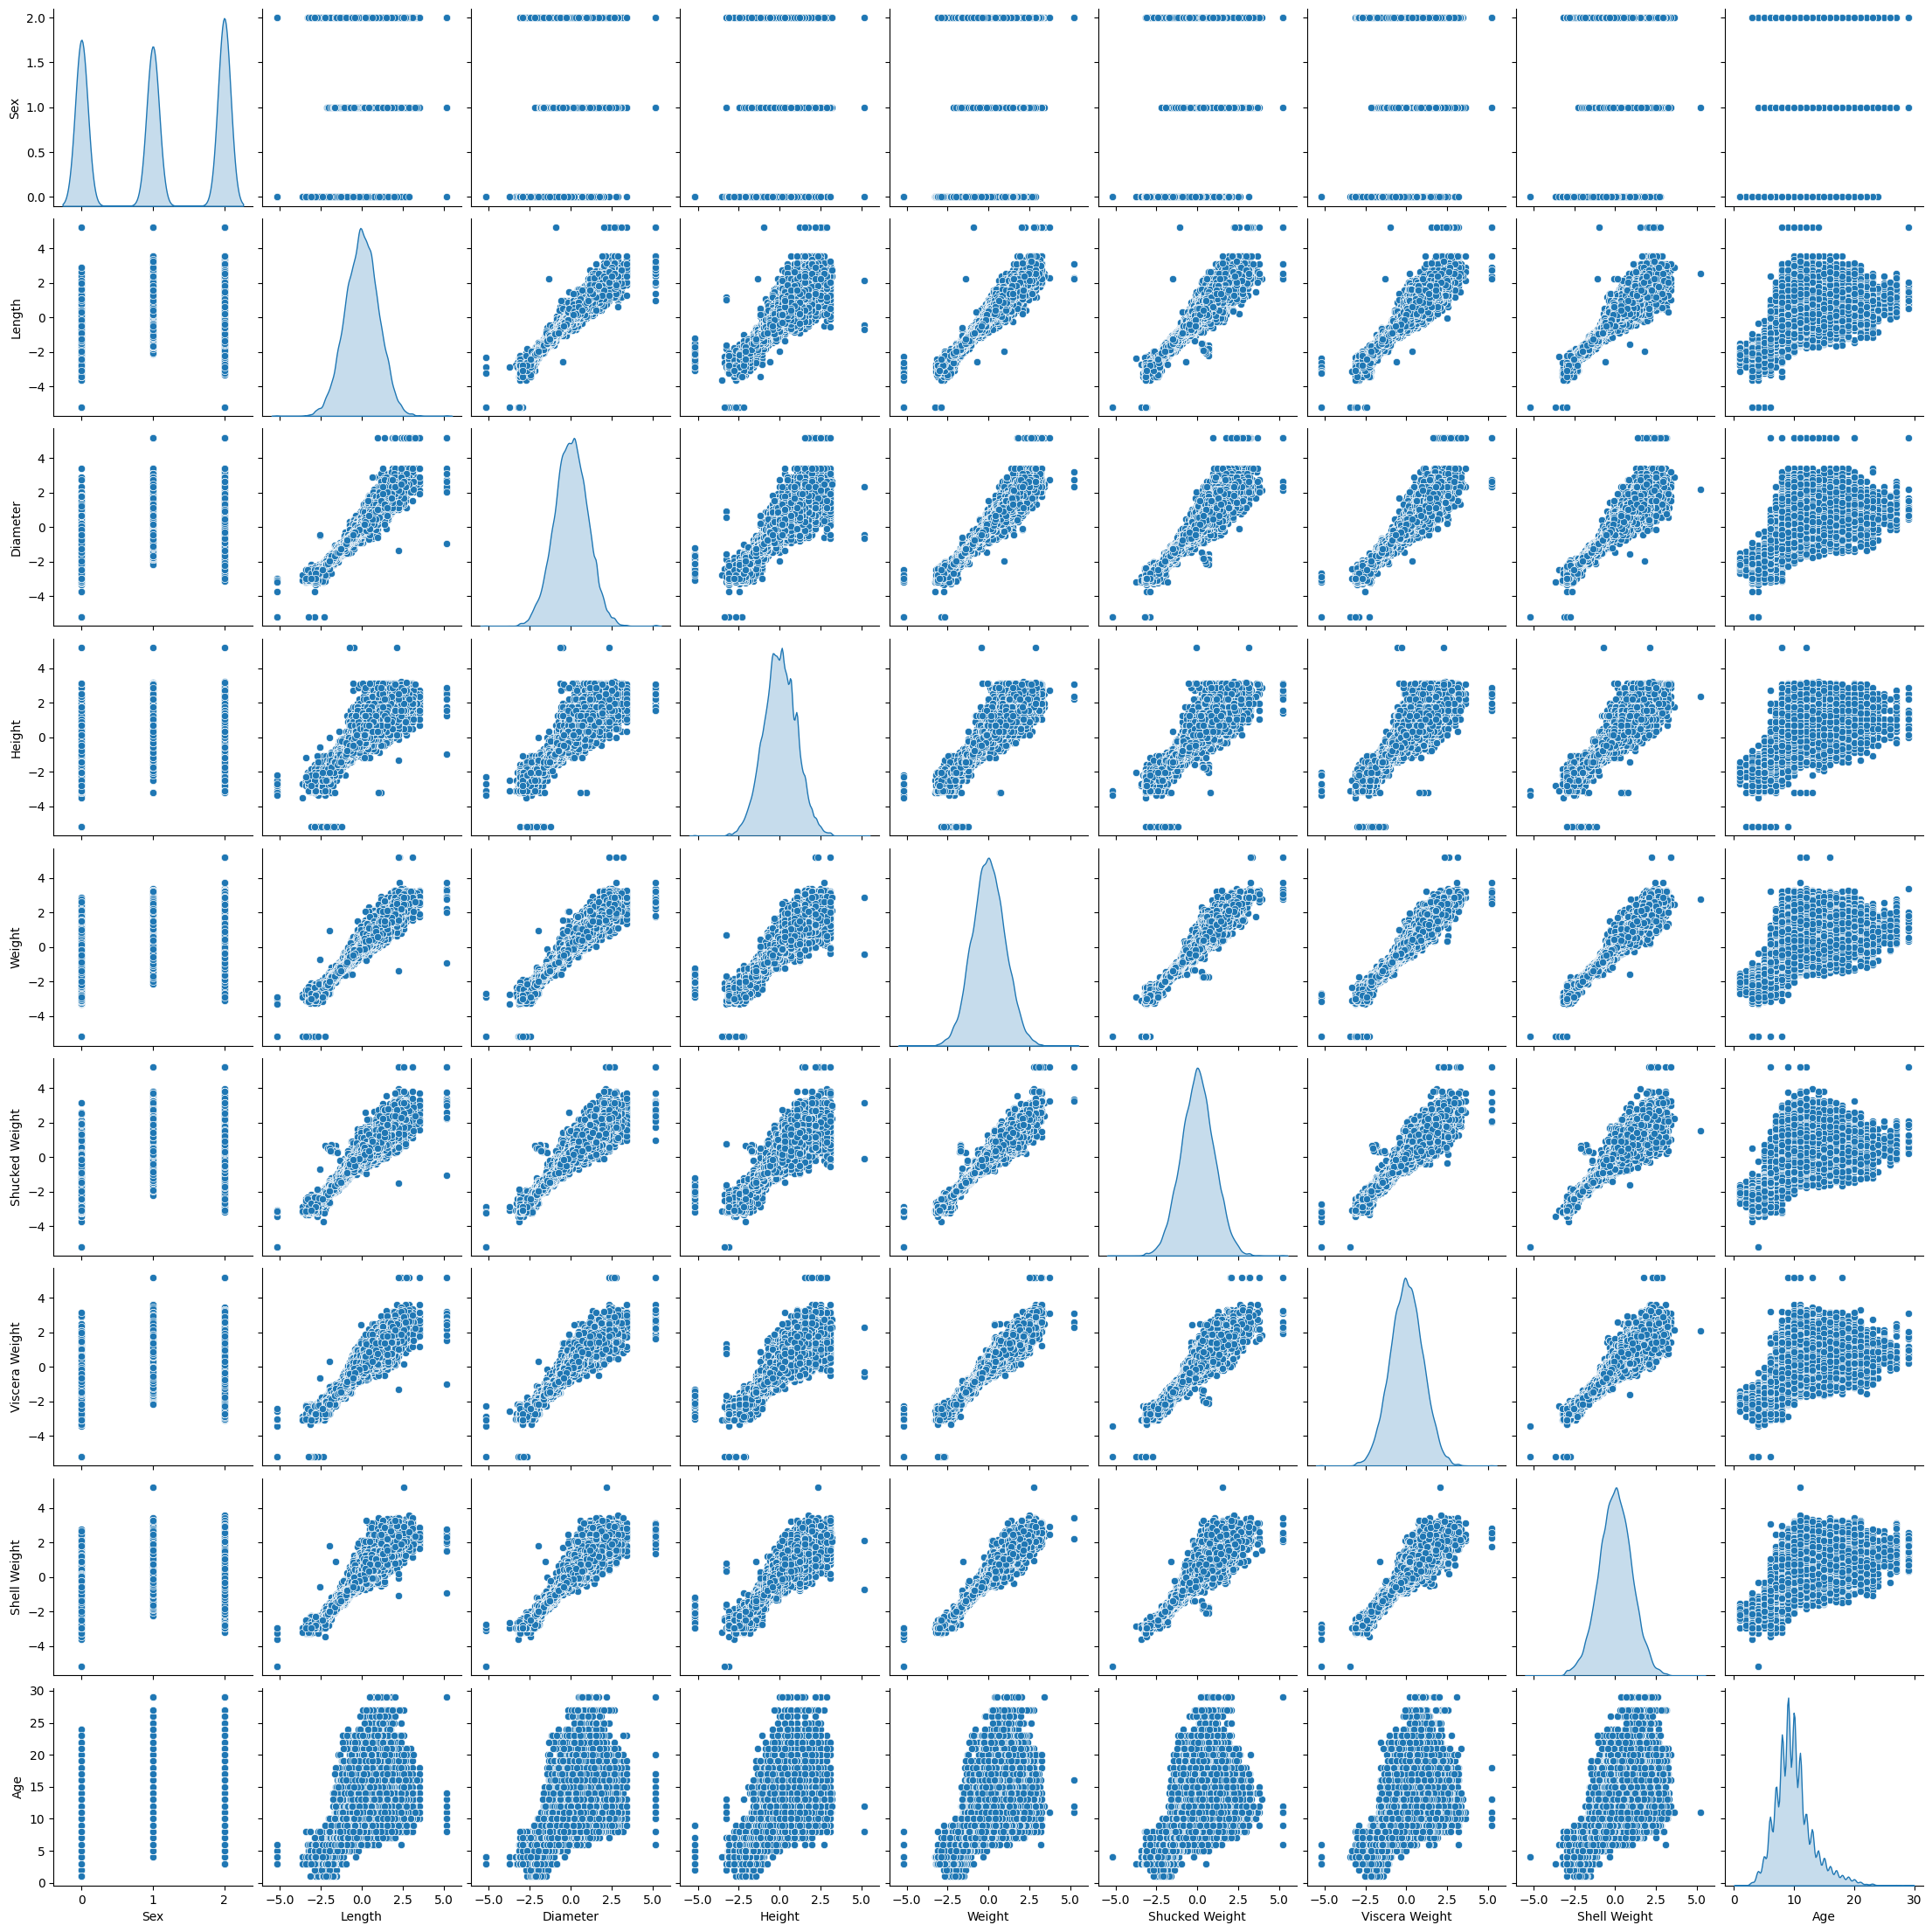

In [7]:
sns.pairplot(df, diag_kind='kde')